In [1]:
# go to root folder
%cd ..

c:\Users\arik_\Documents\Dokumente\Job_Clausthal\TNTM\TNTM_Revision_TNNLS\TNTM


In [2]:
import torch
import numpy as np
import pickle
from Code.TNTM.TNTM_bow import TNTM_bow

c:\Users\arik_\anaconda3\envs\TLDA\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


current device: cpu
current device: cpu


In [3]:
import gensim.downloader as api

# Load pre-trained GloVe model
glove_model = api.load("glove-wiki-gigaword-300")  # 300-dimensional GloVe vectors

In [4]:
glove_model.get_vector("test")

array([ 2.6640e-02,  7.3666e-01,  1.4519e-01, -1.2378e+00, -7.8431e-02,
        1.1878e-01,  1.1072e-01, -5.7459e-01, -5.0329e-01, -2.0694e+00,
        5.6273e-01, -6.5392e-02,  2.6165e-01, -2.9559e-01, -1.3630e-01,
        6.6476e-01,  1.1782e-01,  8.5784e-02, -3.1630e-01, -4.7456e-01,
       -3.1628e-01, -6.1258e-01,  1.6968e-01,  2.9080e-01,  1.5166e-02,
        1.9775e-01,  2.6749e-01,  1.0875e-01, -8.6687e-02, -5.8117e-01,
        1.9078e-02, -3.5914e-01, -2.6973e-01, -7.0312e-02, -7.1556e-01,
        1.1675e-01, -5.7603e-01,  2.2745e-01, -5.4766e-01,  1.5907e-01,
        3.0659e-01,  3.1730e-01,  1.1656e-01, -1.0250e-01,  1.1470e-03,
       -2.2274e-01, -5.3550e-01, -4.3364e-01, -2.0306e-01, -3.5997e-01,
        3.5991e-01, -2.0668e-01,  1.4845e-01,  7.7065e-02,  5.2591e-02,
        3.8939e-01,  9.9486e-02, -5.3198e-01, -1.0236e-01,  3.1587e-01,
        2.4825e-01, -3.3952e-01,  8.6676e-02, -3.4517e-01,  4.2221e-01,
        3.3158e-01,  3.3441e-01, -3.4035e-01,  4.9647e-02,  4.55

In [5]:
with open("C:\\Users\\arik_\\Documents\\Dokumente\\Job_Clausthal\\TNTM\\TNTM_Revision_TNNLS\\TNTM\\Data\\DataOctis\\octis_dataset_20ng.pickle", 'rb') as f:
    dataset_raw = pickle.load(f)   

"""
with open("C:\\Users\\arik_\\Documents\\Dokumente\\Job_Clausthal\\TNTM\\TNTM_Revision_TNNLS\\TNTM\Data\DataOctis\\cleaned_embedding_df_20ng_BERT.pickle", 'rb') as f:
    embedding_df = pickle.load(f)
"""

'\nwith open("C:\\Users\\arik_\\Documents\\Dokumente\\Job_Clausthal\\TNTM\\TNTM_Revision_TNNLS\\TNTM\\Data\\DataOctis\\cleaned_embedding_df_20ng_BERT.pickle", \'rb\') as f:\n    embedding_df = pickle.load(f)\n'

In [9]:
vocab = dataset_raw.get_vocabulary()
corpus = dataset_raw.get_corpus()

In [10]:
embedding_list = []
new_vocab = []

errors = 0

for word in vocab:
    try:
        embedding = glove_model.get_vector(word)
        embedding_list.append(embedding)
        new_vocab.append(word)
    except:
        errors += 1

print(f"Number of words with no embedding: {errors}")                         


Number of words with no embedding: 1


In [11]:
new_corpus = []
new_vocab_set = set(new_vocab)
for doc in corpus:
    new_doc = []
    for word in doc:
        if word in new_vocab_set:
            new_doc.append(word)
    new_corpus.append(new_doc)

In [12]:
len(new_vocab), len(new_corpus)

(1611, 16309)

In [58]:
model = TNTM_bow(
    n_topics = 10,
    save_path = "C:\\Users\\arik_\\Documents\\Dokumente\\Job_Clausthal\\TNTM\\TNTM_Revision_TNNLS\\TNTM\\msc\\SavedResults\\model_v1.pth",
    n_dims = 11,
    n_hidden_units = 200,
    n_encoder_layers = 3,
    enc_lr = 1e-3,
    dec_lr = 1e-3,
    n_epochs = 0,
    #batch_size = 128,
    batch_size = 256,
    dropout_rate_encoder = 0.3,
    prior_variance =  0.995, 
    prior_mean = None,
    n_topwords = 200,
    device = None, 
    validation_set_size = 0.2, 
    early_stopping = True,
    n_epochs_early_stopping = 10,
    return_embeddings = True,
    eps = 0.0,
    umap_hyperparams = {'n_neighbors': 15, 'min_dist': 0.0}
)

In [59]:
word_embedding_ten = np.stack(embedding_list, axis=0)
word_embedding_ten.shape

(1611, 300)

In [60]:
res = model.fit(
    corpus = new_corpus,
    vocab = new_vocab,
    embeddings = torch.tensor(word_embedding_ten)
)

16309it [00:12, 1280.12it/s]
c:\Users\arik_\Documents\Dokumente\Job_Clausthal\TNTM\TNTM_Revision_TNNLS\TNTM\Code\TNTM\TNTM_bow.py:161: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mus_init_ten = torch.tensor(mus_init).to(self.device)
c:\Users\arik_\Documents\Dokumente\Job_Clausthal\TNTM\TNTM_Revision_TNNLS\TNTM\Code\TNTM\TNTM_bow.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  L_lower_init_ten = torch.tensor(L_lower_init).to(self.device)
c:\Users\arik_\Documents\Dokumente\Job_Clausthal\TNTM\TNTM_Revision_TNNLS\TNTM\Code\TNTM\TNTM_bow.py:163: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().require

In [67]:
res[0]

array([['traffic', 'tank', 'compound', ..., 'blame', 'rely', 'ability'],
       ['instance', 'belief', 'assumption', ..., 'mission', 'conference',
        'deal'],
       ['community', 'national', 'international', ..., 'book', 'issue',
        'page'],
       ...,
       ['criminal', 'woman', 'victim', ..., 'finally', 'floor', 'leg'],
       ['spare', 'total', 'amount', ..., 'decent', 'suspect', 'family'],
       ['offer', 'operate', 'introduce', ..., 'faq', 'signature',
        'encryption']], dtype='<U14')

In [48]:
embedding_proj_ten = res[2]
embedding_proj_ten.shape

torch.Size([1611, 11])

In [49]:
topic_doc_mat = res[1]

topic_assignments = np.argmax(topic_doc_mat, axis=0)

In [50]:
len(topic_assignments)

# get histogram of fequency of topic assignments
hist = np.histogram(topic_assignments, bins=range(11))[0]

hist

array([ 14, 617, 796,   0,  56,  51,   0,   6,   0,  71], dtype=int64)

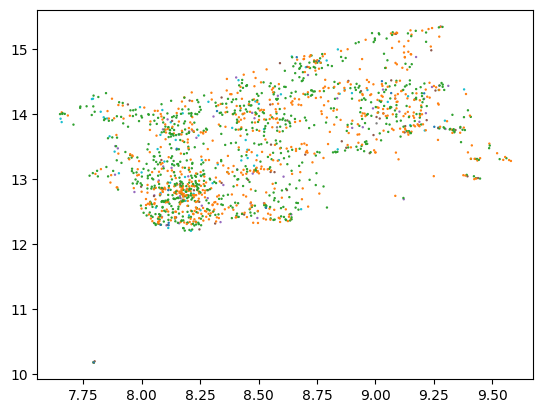

In [51]:
import matplotlib.pyplot as plt

plt.scatter(embedding_proj_ten[:,0], embedding_proj_ten[:,1], s = 0.5, c = topic_assignments, cmap = "tab10")

In [160]:
### use directly the topwords and plot their embeddings

topwords = res[0][:, :150]

# create flat list of topwords and their emebeddings and corresponding topics

topwords_flat = []
topwords_embeddings = []
topwords_topics = []

for i, words in enumerate(topwords):
    for word in words:
        topwords_flat.append(word)
        topwords_embeddings.append(glove_model.get_vector(word))
        topwords_topics.append(i)

In [161]:
len(topwords_flat), len(topwords_embeddings), len(topwords_topics)

(1500, 1500, 1500)

In [162]:
import umap

In [163]:
import matplotlib.pyplot as plt

topwords_embeddings_ten = np.stack(topwords_embeddings, axis=0)

topword_embedding_ten_2d = umap.UMAP(n_neighbors=15, min_dist=0.0).fit_transform(topwords_embeddings_ten)

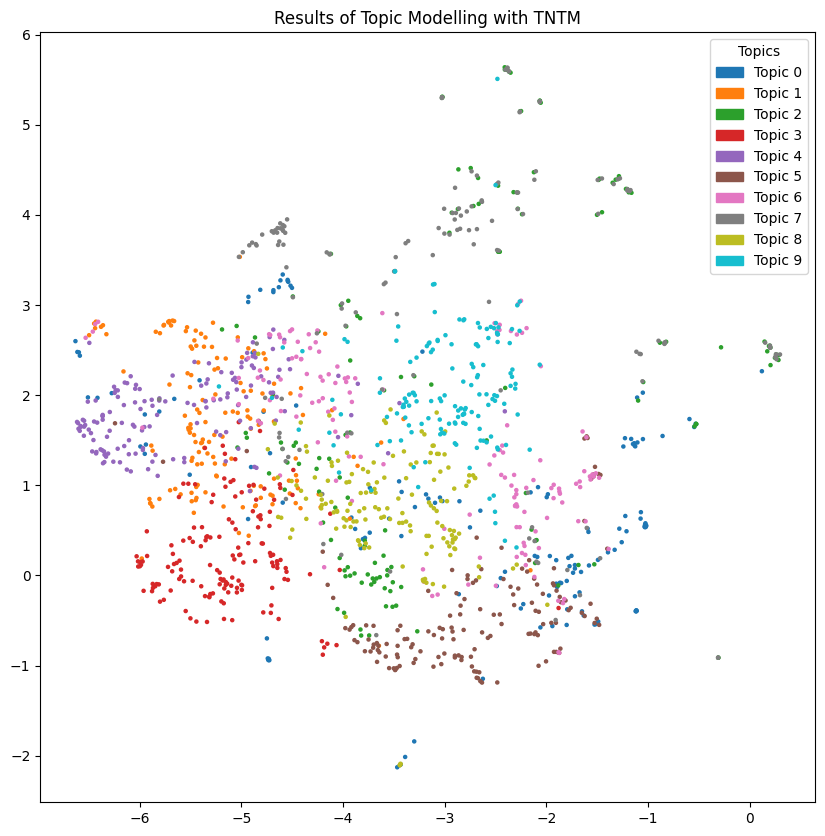

In [166]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Assuming topword_embedding_ten_2d and topwords_topics are defined
# topword_embedding_ten_2d: array of shape (n_samples, 2)
# topwords_topics: array of shape (n_samples,) containing topic indices

# Create the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(topword_embedding_ten_2d[:, 0], topword_embedding_ten_2d[:, 1], s = 5, c=topwords_topics, cmap="tab10")

# Define the colormap and create custom legend
cmap = plt.get_cmap("tab10")
topics = np.unique(topwords_topics)
handles = [mpatches.Patch(color=cmap(i), label=f'Topic {i}') for i in topics]

# Add the legend
plt.legend(handles=handles, title="Topics")
plt.title("Results of Topic Modelling with TNTM")
#plt.xlabel("Component 1")
#plt.ylabel("Component 2")

# Display the plot
plt.show()


In [171]:
# also try t-SNE

from sklearn.manifold import TSNE

topword_embedding_ten_2d_tsne = TSNE(n_components=2, perplexity=5, n_iter=10000).fit_transform(topwords_embeddings_ten)

# Create the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(topword_embedding_ten_2d_tsne[:, 0], topword_embedding_ten_2d_tsne[:, 1], s = 5, c=topwords_topics, cmap="tab10")

# Define the colormap and create custom legend
cmap = plt.get_cmap("tab10")
topics = np.unique(topwords_topics)
handles = [mpatches.Patch(color=cmap(i), label=f'Topic {i}') for i in topics]

# Add the legend
plt.legend(handles=handles, title="Topics")
plt.title("Results of Topic Modelling with TNTM")
#plt.xlabel("Component 1")
#plt.ylabel("Component 2")

# save plot as image

plt.savefig("C:\\Users\\arik_\\Documents\\Dokumente\\Job_Clausthal\\TNTM\\TNTM_Revision_TNNLS\\TNTM\\msc\\SavedResults\\tntm_glove_tsne.png", dpi=300)

KeyboardInterrupt: 